In [1]:
import os, sys
os.environ['R_HOME'] = sys.exec_prefix + '/lib/R/'
import numpy as np
import pandas as pd
import scanpy as sc
import scFates as scf
import matplotlib.pyplot as plt

In [2]:
geo = 'GSE201257'
pth = os.path.join('..', '..')
pth_in = os.path.join(pth, 'data')
pth_data = os.path.join(pth_in, 'processed')
pth_traj = os.path.join(pth_in, 'trajectories')
pth_out = os.path.join(pth, 'figures', 'preprocessing')

In [3]:
df_summary = pd.read_csv(os.path.join(pth_in, 'summary.csv'))
df_summary = df_summary.loc[df_summary.Source == geo]
df_summary

,Source,Name,Study,Species,Trajectory,Age,Description
2,GSE201257,Schwann Cell Precursor,"Kastriti et al, 2022",mmusculus,True,E9.5-Adult,Neural crest cell atlas describing diversifica...


In [4]:
adata = sc.read_h5ad(os.path.join(pth_data, f'{geo}.h5ad'))
adata

AnnData object with n_obs × n_vars = 8842 × 21676
    obs: 'plates', 'devtime', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'doublet_scores', 'leiden', 'CytoTRACE', 'Gut_neuron', 'Sensory', 'Symp', 'enFib', 'ChC', 'Gut_glia', 'NCC', 'Mesenchyme', 'Melanocytes', 'SatGlia', 'SC', 'BCC', 'conflict', 'assignments', 'Hub', 'Hub_leiden', 'celltype'
    var: 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'Hub_colors', 'assignments_colors', 'celltype_colors', 'devtime_colors', 'leiden', 'leiden_colors', 'leiden_sizes', 'location_colors', 'log1p', 'neighbors', 'paga', 'umap'
    obsm: 'X_diff', 'X_pca', 'X_umap'
    layers: 'palantir_imp', 'scaled'
    obsp: 'connectivities', 'distances'

In [5]:
adata_traj = sc.read_h5ad(os.path.join(pth_traj, f'{geo}.h5ad'))
adata_traj

AnnData object with n_obs × n_vars = 1215 × 164
    obs: 'plates', 'devtime', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'doublet_scores', 'leiden', 'CytoTRACE', 'Gut_neuron', 'Sensory', 'Symp', 'enFib', 'ChC', 'Gut_glia', 'NCC', 'Mesenchyme', 'Melanocytes', 'SatGlia', 'SC', 'BCC', 'conflict', 'assignments', 'Hub', 'Hub_leiden', 'celltype', 't', 'seg', 'edge', 'old_milestones', 'old_seg', 'milestones'
    var: 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable', 'p_val', 'A', 'fdr', 'st', 'signi', 'clusters'
    uns: 'Hub_colors', 'assignments_colors', 'celltype_colors', 'devtime_colors', 'graph', 'leiden', 'leiden_colors', 'leiden_sizes', 'location_colors', 'log1p', 'milestones_colors', 'neighbors', 'old_milestones_colors', 'old_milestons_colors', 'old_seg_colors', 'paga', 'ppt', 'pseudotime_list', 'seg_colors', 'stat_assoc_list', 'um

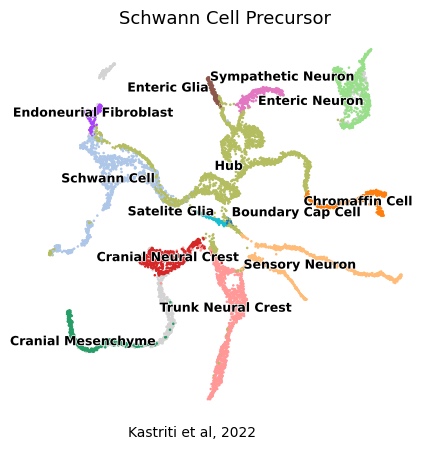

In [44]:
from adjustText import adjust_text

# s = 60
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sc.pl.umap(adata, color = 'celltype', #size = s,
           legend_fontsize = 9,
           na_in_legend = False,
           legend_loc = 'on data', legend_fontoutline = 1,
           frameon = False, show = False, ax = ax)
adjust_text([x for x in ax.texts if x.get_text() in ['Satelite Glia', 'Boundary Cap Cell', 'Enteric Glia', 'Enteric Neuron', 'Sympathetic Neuron']], ax = ax, force_text = (1e-3, 1e-3))
# ax.invert_xaxis()
ax.set_title(df_summary.Name.values[0], size = 13)
ax.text(.25, -.05, df_summary.Study.values[0], transform = ax.transAxes)
# fn = os.path.join(pth_out, 'processed', f'{geo}.pdf')
# plt.savefig(fn, bbox_inches = 'tight')
plt.show()

['Boundary Cap Cell',
 'Chromaffin Cell',
 'Cranial Mesenchyme',
 'Cranial Neural Crest',
 'Endoneurial Fibroblast',
 'Enteric Glia',
 'Enteric Neuron',
 'Hub',
 'Satelite Glia',
 'Schwann Cell',
 'Sensory Neuron',
 'Sympathetic Neuron',
 'Trunk Neural Crest',
 'Kastriti et al, 2022']